In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
boston = pd.read_csv('boston.csv', header=1)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
x_p= boston.iloc[:, 5:6]
x_p

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [5]:
y_p= boston.iloc[:, 13:14]
y_p

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


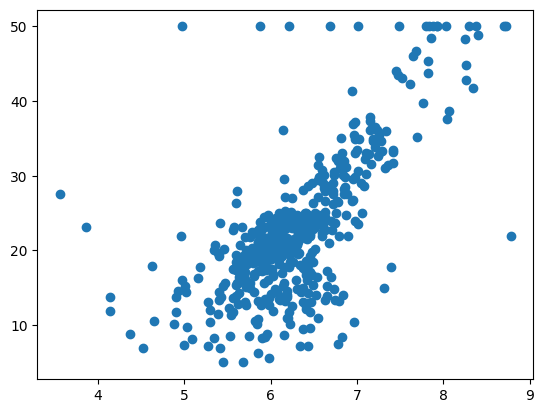

In [6]:
plt.scatter(x_p, y_p)
plt.show()

In [7]:
#separamos los datos de entrenamiento y prueba
x_train, x_test, y_train, y_test= train_test_split(x_p, y_p, test_size= 0.2)

In [11]:
#Definir el grado de polinomio
poli_reg= PolynomialFeatures(degree= 2)

In [12]:
#Se transforma las caracteristicas existentes en las caracteristicas de mayor rango
x_train_pol= poli_reg.fit_transform(x_train)
x_test_pol= poli_reg.fit_transform(x_test)

In [13]:
#Definimos el modelo a entrenas
reg_pol= LinearRegression()

In [14]:
#Entrenamos el modelo
reg_pol.fit(x_train_pol, y_train)

LinearRegression()

In [16]:
y_pred= reg_pol.predict(x_test_pol)
df_pred = pd.DataFrame(y_pred, columns=['PREDICCION'])
df_pred, y_test

(     PREDICCION
 0     24.530194
 1     18.991638
 2     19.483321
 3     18.446787
 4     19.163685
 ..          ...
 97    18.471304
 98    16.133866
 99    15.046221
 100   19.017886
 101   18.343488
 
 [102 rows x 1 columns],
      MEDV
 435  13.4
 418   8.8
 47   16.6
 484  20.6
 492  20.1
 ..    ...
 170  17.4
 142  13.4
 152  15.3
 71   21.7
 164  22.7
 
 [102 rows x 1 columns])

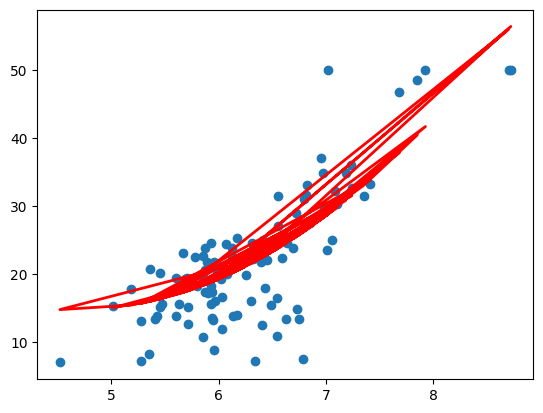

In [21]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c= 'r', linewidth= 2)
plt.show()

In [23]:
print(f'y= {reg_pol.coef_}x + {reg_pol.intercept_}')

y= [[  0.         -23.41265666   2.51506075]]x + [69.21176812]


In [24]:
reg_pol.score(x_train_pol, y_train)

0.5236919185491877